# Praca domowa nr 2 ,,Planowanie i analiza eksperymentu''
wykonał Paweł Jan Tłusty
s95596
Zestaw zadań dla grupy 1.1

Wersja online: Notes dostępny również w serwisie GitHub (niektóre wykresy niewłaściwie dzedziczą style, zaleca zaleca się jasny motyw lub otwieranie poszczególnych wykresów jako obraz w nowej karcie) 


Link:

https://github.com/Kotmin/R-Planowanie-Eksperymentu

Dla wszystkich zadań, o ile nie zaznaczono inaczej, przyjmujemy domyślny poziom istotności **α = 0.05**. W przypadkach, gdzie zostaje on zmieniony (np. α = 0.01), informujemy o tym lokalnie przy interpretacji wyników.


## Zadanie 1: Porównanie średnich wag mandarynek z dwóch plantacji

#### Dane:
- Waga1 = c(75, 67, 73, 78, 70, 78, 84, 75, 70, 72, 78)
- Waga2 = c(80, 75, 82, 76, 78, 82, 80, 85, 76, 72)

#### Cel:
Sprawdzić, czy średnia waga mandarynek z dwóch plantacji jest taka sama.

#### Hipotezy:
- **H₀ (hipoteza zerowa):** Średnia waga mandarynek z plantacji 1 = średnia waga z plantacji 2
- **H₁ (hipoteza alternatywna):** Średnie są różne


In [16]:
waga1 <- c(75, 67, 73, 78, 70, 78, 84, 75, 70, 72, 78)
waga2 <- c(80, 75, 82, 76, 78, 82, 80, 85, 76, 72)

In [17]:
length(waga1); length(waga2) # Rozmiary prób

[1] 11

[1] 10

In [18]:
mean(waga1); var(waga1)
mean(waga2); var(waga2)

[1] 74.54545

[1] 23.27273

[1] 78.6

[1] 15.37778

In [19]:
waga1

[1] 75 67 73 78 70 78 84 75 70 72 78

In [20]:
waga2

[1] 80 75 82 76 78 82 80 85 76 72

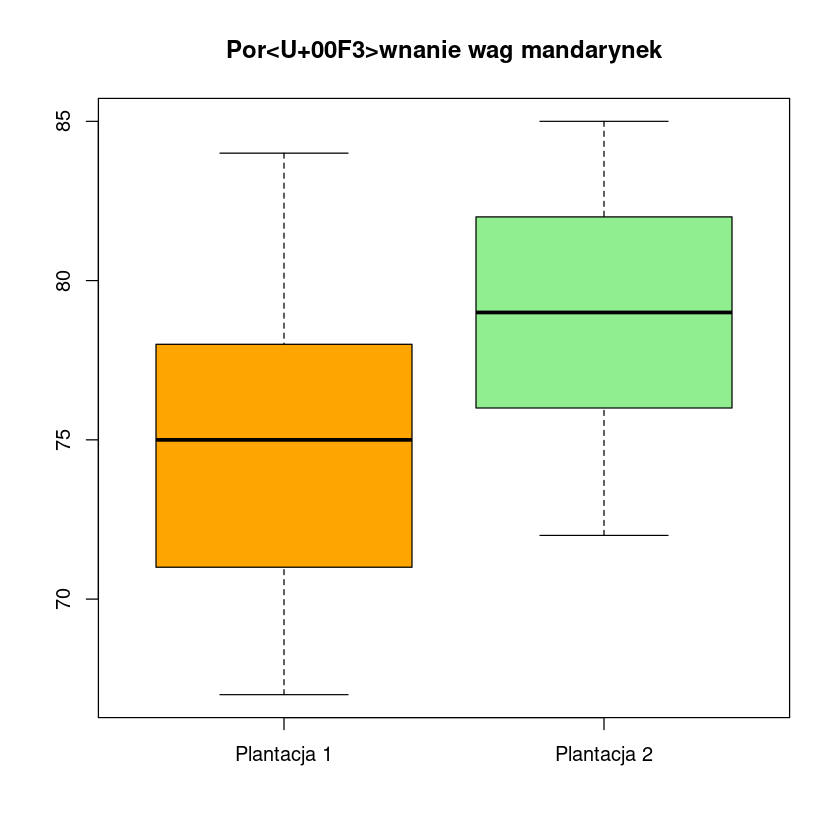

In [21]:
boxplot(waga1, waga2, names = c("Plantacja 1", "Plantacja 2"), col = c("orange", "lightgreen"), main = "Porównanie wag mandarynek")

In [22]:
# par(mfrow = c(2, 1))

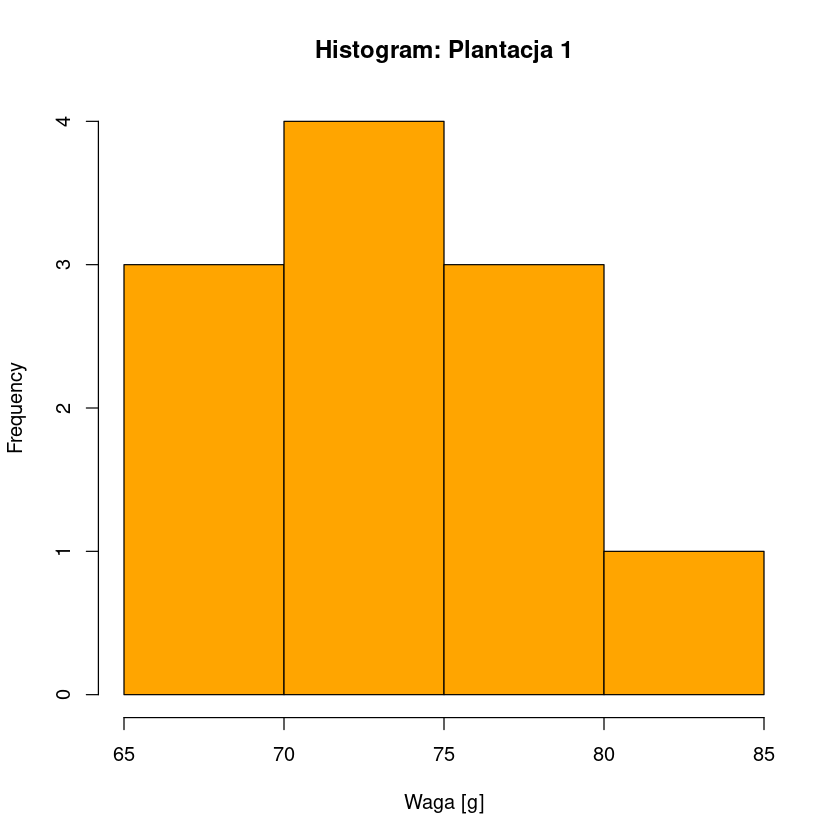

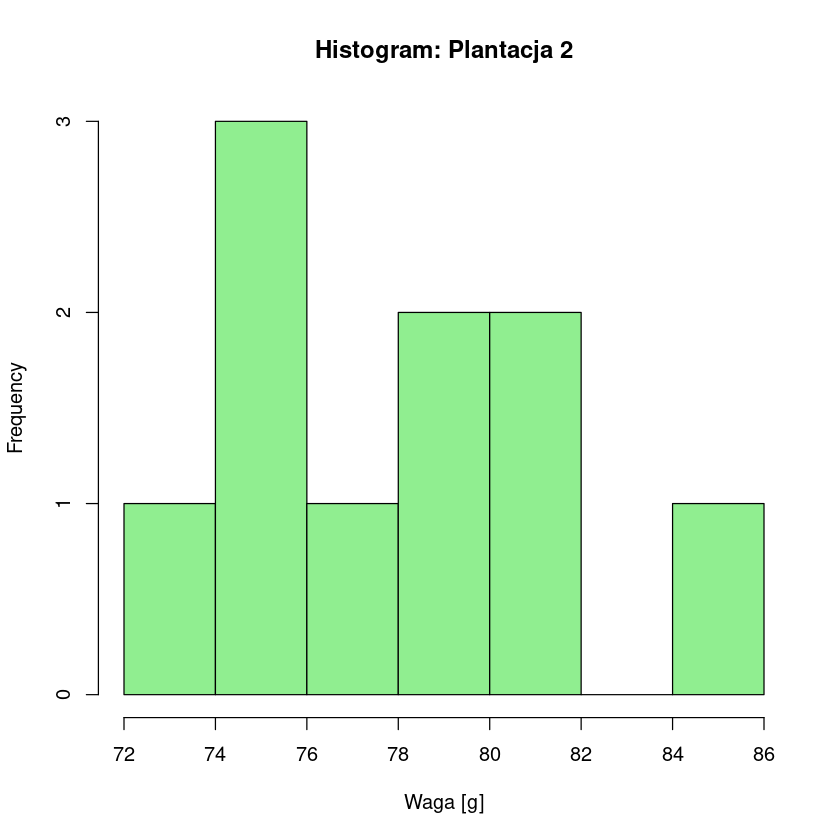

In [23]:
hist(waga1, main = "Histogram: Plantacja 1", col = "orange", xlab = "Waga [g]")
hist(waga2, main = "Histogram: Plantacja 2", col = "lightgreen", xlab = "Waga [g]")

In [26]:
# sprawdźimy czy dane mają rozkład normalny
# używamy testu Shapiro-Wilka (próbki są małe)
# test SW jest skonstruowany z hipotezami:
# H0: dane pochodzą z rozkładu normalnego
# H1: dane nie pochodzą z rozkładu normalnego / dane są istotne różne od rozkładu normalnego

shapiro.test(waga1)
shapiro.test(waga2)


	Shapiro-Wilk normality test

data:  waga1
W = 0.96419, p-value = 0.8227



	Shapiro-Wilk normality test

data:  waga2
W = 0.97536, p-value = 0.9356


In [29]:
# p-value większe od 0.05 --dla obu przypadków.
# nie znaleźliśmy podstaw do odrzucenia hipotezy zerowej. Dane pochodzą z rozkładu normalnego
# gdyby dane nie pochodizły z r.norm. użylibyśmy zapewne testu wilcoxona dla średnich, dla zgodności z rozkładem normalnym użyjemy
# dobranej wersji t-test
# w celu doboru sprawdźmy wariancję
var.test(waga1, waga2)
# h0 wariancje są równe
# h1 wariancje się różnią



	F test to compare two variances

data:  waga1 and waga2
F = 1.5134, num df = 10, denom df = 9, p-value = 0.545
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.381799 5.719082
sample estimates:
ratio of variances 
            1.5134 


In [30]:
# wariancje są znane, nie znaleźliśmy podstaw do odrzucenia hipotezy zerowej. Wariancje nie różnią się istotnie statycznycznie
t.test(waga1, waga2, var.equal = TRUE)



	Two Sample t-test

data:  waga1 and waga2
t = -2.0996, df = 19, p-value = 0.04935
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.09632069 -0.01277022
sample estimates:
mean of x mean of y 
 74.54545  78.60000 


In [ ]:
# p-value mniejsze od 0.05 - odrzucamy hipotezę zerową

### Podsumowanie Z1: Porównanie średniej wagi mandarynek z dwóch plantacji
Czy można twierdzić, że średnia waga mandarynek jest taka sama dla
każdej z plantacji?

-- Nie.


#### Hipotezy:
- Hipoteza zerowa (H0): średnia waga mandarynek jest taka sama dla obu plantacji (mu1 = mu2)
- Hipoteza alternatywna (H1): średnia waga mandarynek różni się (mu1 ≠ mu2)

#### Założenia:
- Próbki są niezależne – pochodzą z dwóch różnych plantacji
- Dane mają rozkład normalny (sprawdzone testem Shapiro-Wilka)
- Wariancje są równe (sprawdzone testem Fishera)

#### Wyniki testu t:
- Statystyka t: -2.0996  
- p-value: 0.04935  
- Przedział ufności 95%: [-8.10, -0.01]  
- Średnia (plantacja 1): 74.55 g  
- Średnia (plantacja 2): 78.60 g

#### Wniosek:
Na poziomie istotności alfa = 0.05, odrzucamy hipotezę H0 – istnieje statystycznie istotna różnica średnich wag mandarynek między plantacjami.

p-value bardzo bliskie 0.05 → wynik interpretować ostrożnie.